# NAML Project 4

## Credit Card Fraud Detection 

Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import jax.numpy as jnp
import jax

from tqdm.notebook import tqdm
from math import sqrt
from random import seed
from random import randrange
from math import pi
from math import exp

Load the data

In [ ]:
dataset = pd.read_csv('creditcard.csv')

In [ ]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Inspection

Check if there are some missing entries

In [ ]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Remove records with missing entries if present

In [ ]:
dataset = dataset.dropna()
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Visualize the first rows of the dataset

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Visualize information about the dataset including the index dtype and columns, non-null values and memory usage.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Visualize first order statistics of the dataset including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [ ]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Print distribution and approximation of data related to the seconds elapsed between each transaction and the first transaction

/Users/margheritamusumeci/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Time', ylabel='Density'>

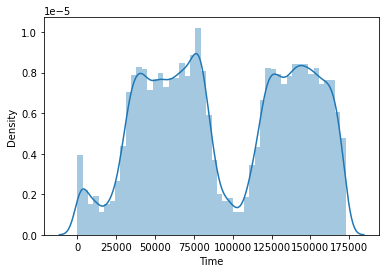

In [ ]:
sns.distplot(dataset['Time'])

Visualize pairwise correlation of columns


In [ ]:
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


Display correlations 

<AxesSubplot:>

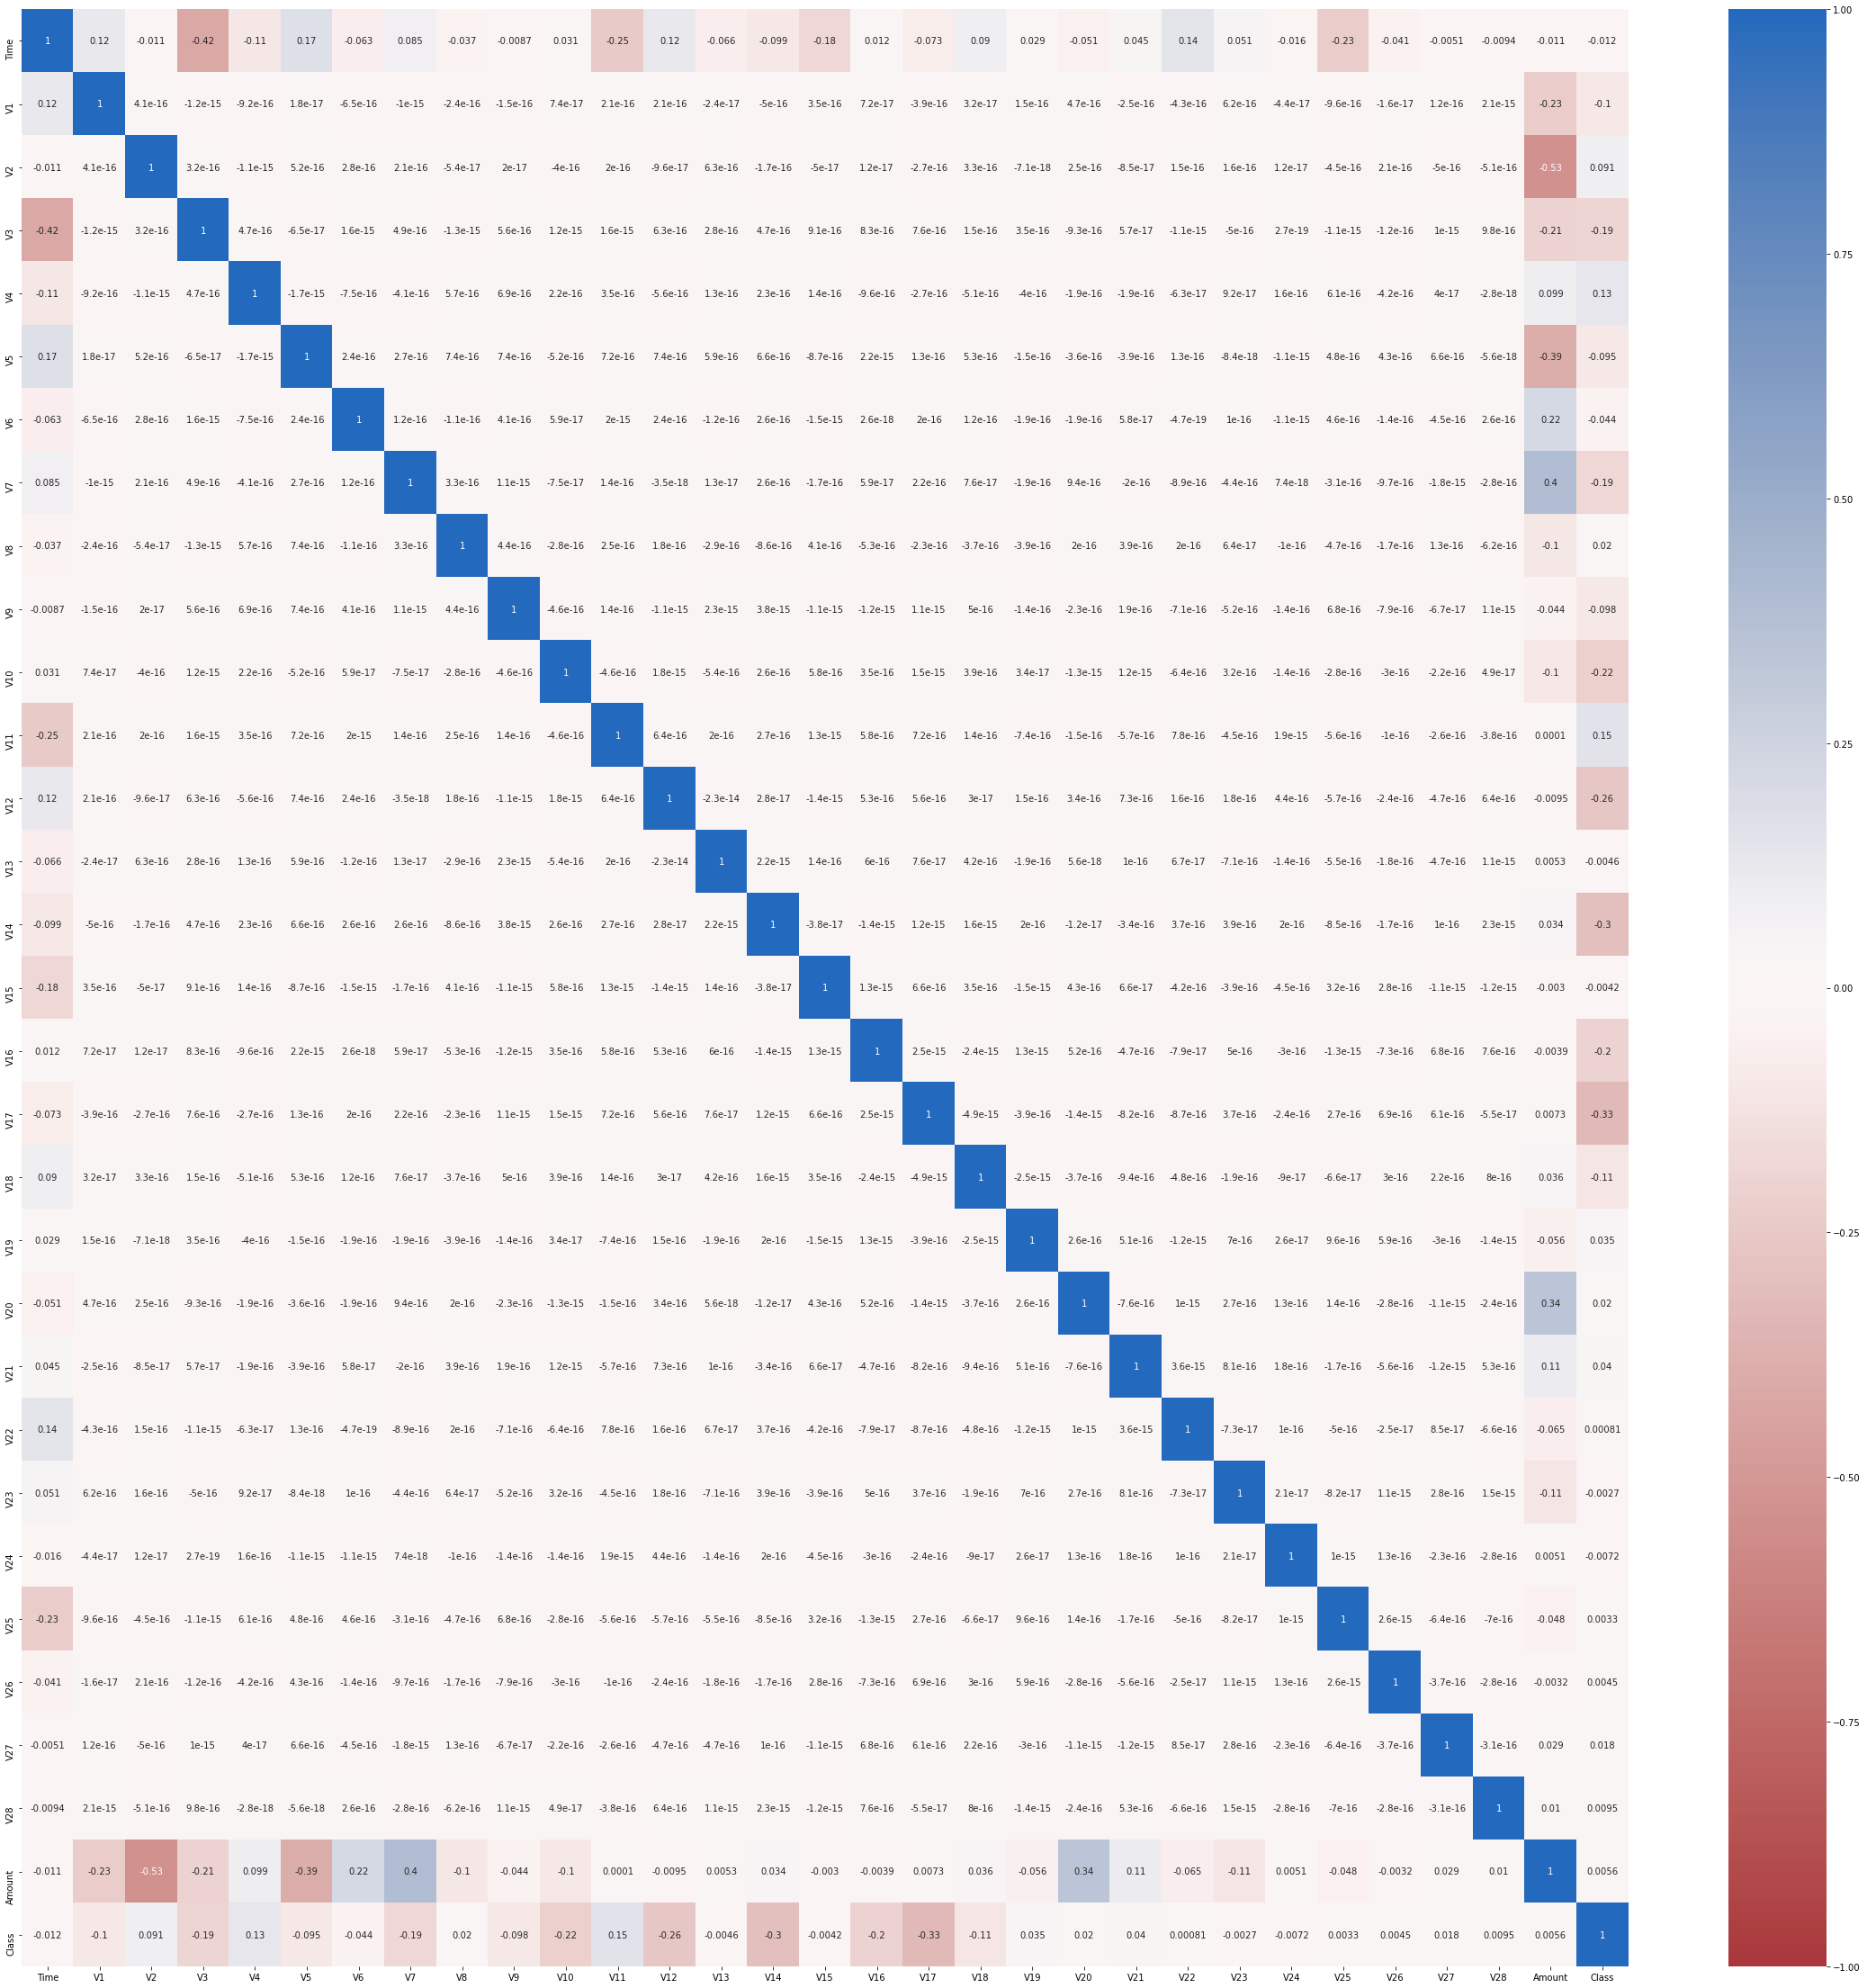

In [ ]:
fig, ax = plt.subplots(figsize=(40,40))   
sns.heatmap(dataset.corr(),ax = ax,  annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)

Show the values assigned to each attribute for those transactions that are classified as fraudulent (`red`) compared to those that are not fraudolent (`green`).

The plots are zoomed-in versions of the real plots to better display the red values

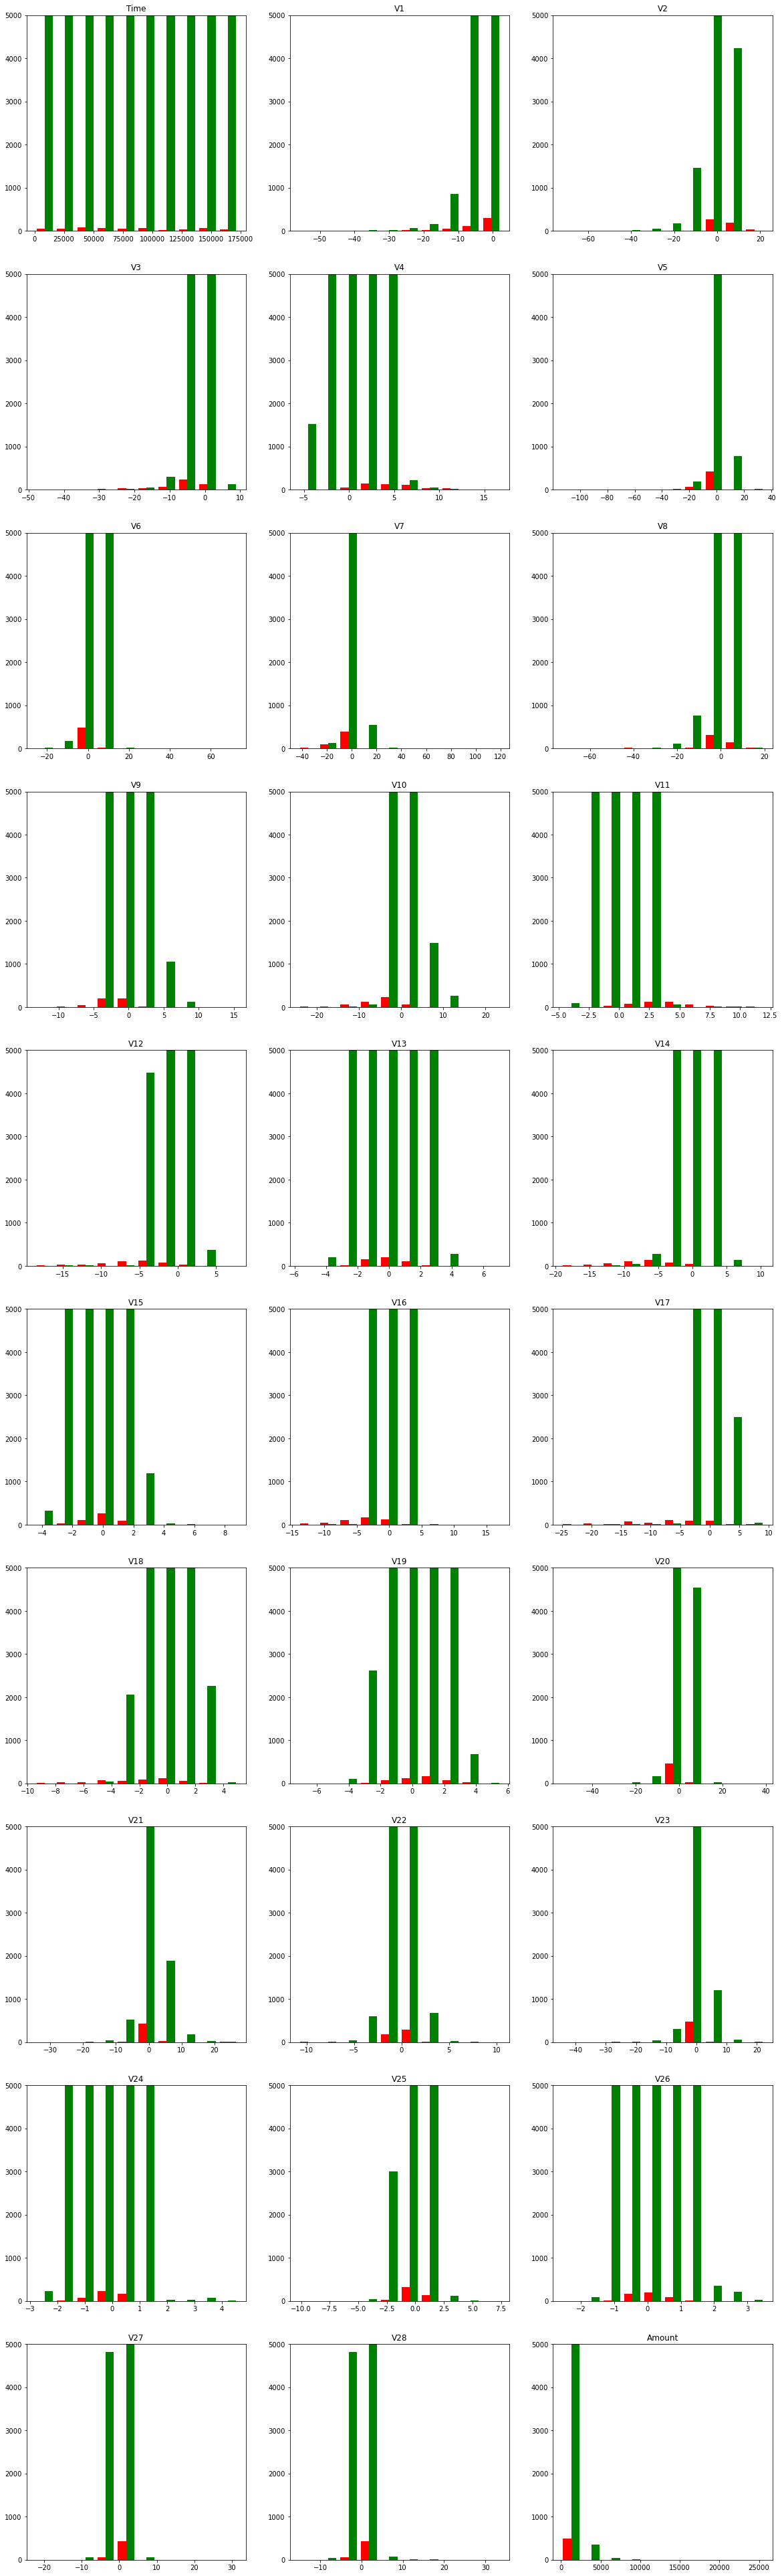

In [ ]:
# split the dataset in fraud and no-fraud subsets

#shuffle rows of the dataset
# frac = 1 determines what fraction of total instances need to be returned
dataset_shuffled = dataset.sample(frac = 1) 

fraud = dataset_shuffled[dataset_shuffled["Class"] == 1]
no_fraud = dataset_shuffled[dataset_shuffled["Class"] == 0]

# create the subplot schema
fig, ax = plt.subplots(10, 3, sharex=False, sharey=False, figsize=(20,70))

n = 30 # number of columns to be printed   
colors = ['red', 'green']

axis = ax.flatten()

for i,j in zip(range(n), axis):
    j.hist([fraud.iloc[:,i], no_fraud.iloc[:,i]], color=colors)
    j.set_title(fraud.columns[i])
    j.set_ylim(top = 5000) # fix y top limit to 5000

## Data Normalization

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

We apply this technique to all the columns of the dataset except for `Class`

In [ ]:
# remove 'Class' column
dataset_to_be_normalized = dataset.iloc[:,:-1]

# compute the mean 
data_mean = dataset_to_be_normalized.mean()
# compute the standard deviation
data_std = dataset_to_be_normalized.std()
# normalize the data
data_normalized = (dataset_to_be_normalized - data_mean) / data_std

# append 'Class' column
data_normalized['Class'] = dataset.iloc[:,-1]

Display the distribution of the new values

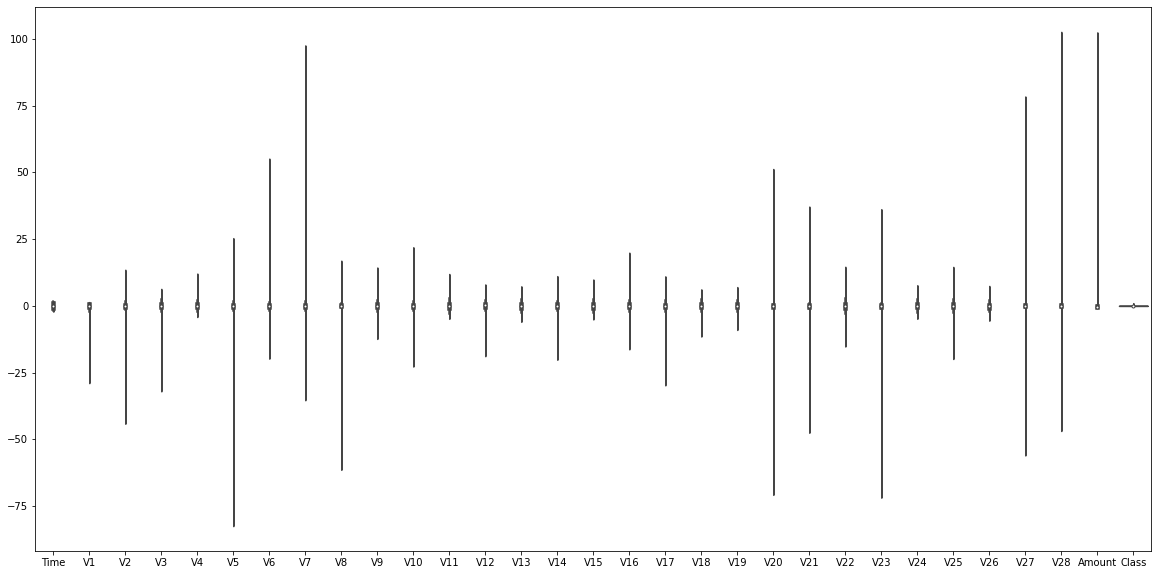

In [ ]:
_, ax = plt.subplots(figsize=(20,10))
sns.violinplot(data = data_normalized, ax = ax)

## Dataset division - Train-validation split

Shuffle the data using the np.random.shuffle function and split the data as follows:

- put 70% in the training dataset
- put 30% in the validation dataset

In [ ]:
# define parameter : test_set / training_set
fraction_validation = 0.3 # 30% of test set and 70% of training set

# parse to numpy
data_normalized_np = data_normalized.to_numpy()

# shuffle data
np.random.seed(0) # set seed to 0 for reproducibility
np.random.shuffle(data_normalized_np) 

# divide into training_set and test_set
num_train = int(data_normalized_np.shape[0] * (1 - fraction_validation))

train_set = data_normalized_np[:num_train,:]
valid_set = data_normalized_np[num_train:,:]

print('train set size     : %d' % train_set.shape[0])
print('validation set size: %d' % valid_set.shape[0])

train set size     : 199364
validation set size: 85443


Visualize the dimensions of the sets 

In [ ]:
print('Dataset: ')
print('Number of fraud transactions     : %d' % sum(dataset["Class"]))
print('Number of non-fraud transactions : %d' % sum(dataset["Class"] == 0))
print('Number of transactions           : %d' % dataset["Class"].shape[0])

print('\nTraining set: ')
print('Number of fraud transactions     : %d' % np.sum(train_set[:,data_normalized_np.shape[1]-1]))
print('Number of non-fraud transactions : %d' % np.sum(train_set[:,data_normalized_np.shape[1]-1]  == 0))
print('Number of transactions           : %d' % train_set.shape[0])

print('\nValidation set: ')
print('Number of fraud transactions     : %d' % np.sum(valid_set[:,data_normalized_np.shape[1]-1]))
print('Number of non-fraud transactions : %d' % np.sum(valid_set[:,data_normalized_np.shape[1]-1] == 0))
print('Number of transactions           : %d' % valid_set.shape[0])

Dataset: 
Number of fraud transactions     : 492
Number of non-fraud transactions : 284315
Number of transactions           : 284807

Training set: 
Number of fraud transactions     : 337
Number of non-fraud transactions : 199027
Number of transactions           : 199364

Validation set: 
Number of fraud transactions     : 155
Number of non-fraud transactions : 85288
Number of transactions           : 85443


## Preprocess data - Random under sampling

The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.


*   Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
*   Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

*This method is valid under the hypothesis that the number of the no-fraud transaction is more than a hundred times the number of fraud ones*


In [ ]:
# this function is used to create the training and test sets for the ANN

def RUS_array(ratio,train_set):
  '''It returns an array obtained by merging two arrays, one containing the fraud training set and the
  other containing the non-fraud training set.
  The ratio parameter defines the ratio fraud/non-fraud.
  e.g.: ratio=1 and len(train_fraud)= 100 implies that len(new_train_not_fraud)=100.
  
  @param: ratio It is the ratio between fraud and non-fraud data; it is defined as: ratio:=fraud_set/non-fraud_set.
  @param train_set It is the training set.
  '''
  fraud = train_set[train_set[:,-1] == 1]
  non_fraud = train_set[train_set[:,-1] == 0]

  np.random.seed(0) # set seed to 0 for reproducibility
  np.random.shuffle(non_fraud) 

  new_non_fraud = non_fraud[:int(fraud.shape[0]*ratio),:]

  new_train_set = np.r_[new_non_fraud,fraud]
  np.random.shuffle(new_train_set) 

  # concatenate the two matrix
  return new_train_set

In [ ]:
def RUS(ratio, training_set):
  '''It returns a list obtained by merging two lists, one containing the fraud training set and the
  other containing the non-fraud training set.
  The ratio parameter defines the ratio fraud/non-fraud.
  e.g.: ratio=1 and len(train_fraud)= 100 implies that len(new_train_not_fraud)=100.
  
  @param: ratio It is the ratio between fraud and non-fraud data; it is defined as: ratio:=fraud_set/non-fraud_set.
  @param training_set It is the training set.
  '''
  # initialize the two lists
  train_fraud = list()
  train_not_fraud = list()

  # for each sample in the training set, append it to the proper class
  for sample in training_set:
    if sample[-1] == 1:
      train_fraud.append(sample)
    else:
      train_not_fraud.append(sample)
  
  print('train_fraud len        : ', len(train_fraud))
  print('train_not_fraud len    : ', len(train_not_fraud))
  
  # compute new length of train_not_fraud
  new_length_train_not_fraud = int(len(train_fraud) / ratio)
  print('new train_not_fraud len: ', new_length_train_not_fraud)

  # shuffle train_not_fraud
  np.random.seed(0) # set seed to 0 for reproducibility
  np.random.shuffle(train_not_fraud)

  # take the first new_length_train_not_fraud elements from train_not_fraud
  train_not_fraud_reduced = train_not_fraud[0:new_length_train_not_fraud]

  # create a unique list for the training set
  train_fraud.extend(train_not_fraud_reduced)

  # shuffle the result set
  np.random.seed(0) # set seed to 0 for reproducibility
  np.random.shuffle(train_fraud)

  print('new training set len   : ', len(train_fraud))
  print('\n')

  # return the whole new training set
  return train_fraud

In [ ]:
# define parameters -> inside the training_set: fraud / non-fraud
ratio1 = 1 # 50:50
ratio2 = 34/66 # 34:66
ratio3 = 1/3 # 25:75

Apply random under sampling to the training set --> obtain lists 

In [ ]:
training_set1 = RUS(ratio1, train_set)
training_set2 = RUS(ratio2, train_set)
training_set3 = RUS(ratio3, train_set)

train_fraud len        :  337
train_not_fraud len    :  199027
new train_not_fraud len:  337
new training set len   :  674


train_fraud len        :  337
train_not_fraud len    :  199027
new train_not_fraud len:  654
new training set len   :  991


train_fraud len        :  337
train_not_fraud len    :  199027
new train_not_fraud len:  1011
new training set len   :  1348




Apply RUD and obtain arrays 

In [ ]:
# necessary below for the ANN
train_set1 = RUS_array(ratio1,train_set)
train_set2 = RUS_array(ratio2,train_set)
train_set3 = RUS_array(ratio3,train_set)

## **Classification techniques** - Logistic Regression



### Define functions 

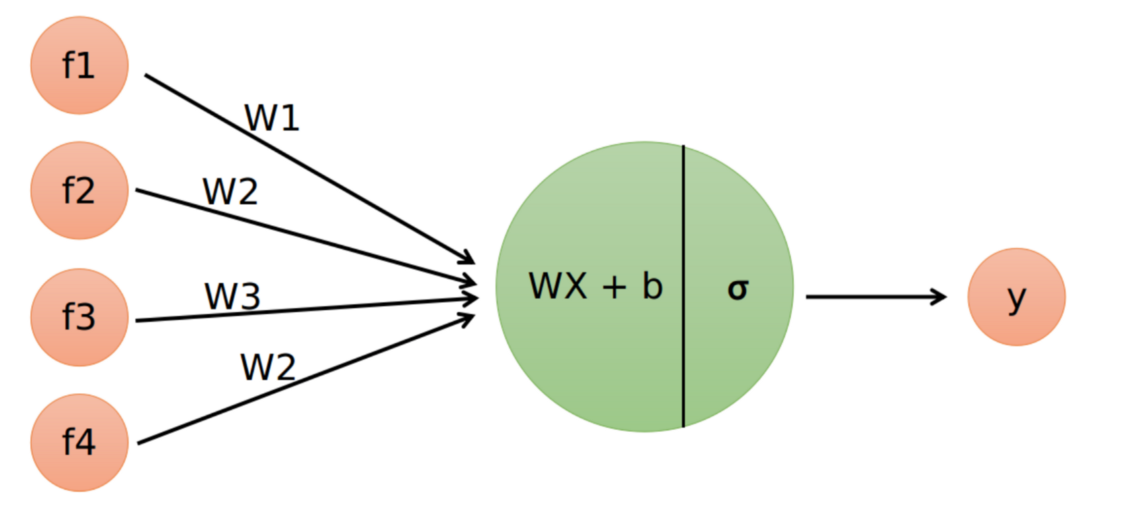

Firstly we define some useful functions

In [ ]:
def initialize_params(weight_size):
  """
  The purpose of this function is to initialize the weights 

  @params: weight_size: number of features 
  @return: array of dimention 'weights_size' initialize to a random number between 0 and 1
  """
  
  rgen = np.random.RandomState(seed = 1) # generator of random numbers, seed = 1 for reproducibility
  # loc = mean (center) of the distribution  
  # scale = standard deviation 
  # size = output shape
  return rgen.normal(loc=0.0, scale=0.1, size=weight_size ) 
  #return np.zeros(weight_size)

**Sigmoid function**, also called logistic sigmoid function, has the role of activation function.  It is define as 



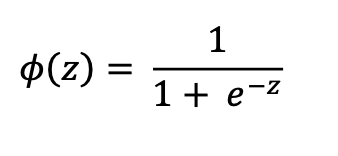

where z is 

> *z = w * x + b*

and

> *w = weights*

> *x = features*

> *b = bias*


The output of the sigmoid function is interpreted as the probability of
a particular example belonging to class 1.

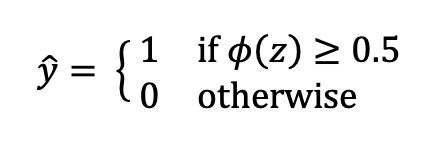

In [ ]:
def sigmoid(z):
  """
  This function returns the value of the sigmoid function given an input value

  @params: z: a linear combination of the input and the features associated with the training examples
  @return: value of the sigmoid in the specified point
  """
  return (1/(1+np.exp(-z)))

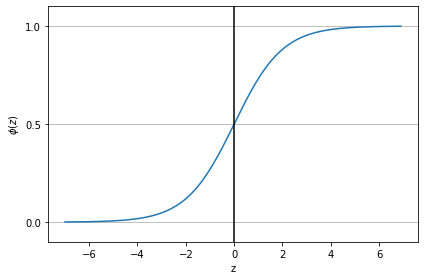

In [ ]:
# print the sigmoid function in the range (-7 , +7)

# define range
z = np.arange(-7, 7, 0.1) 

# calculate the sigmoid
phi_z = sigmoid(z) 
plt.plot(z, phi_z)

plt.axvline(0.0, color='k') 
plt.ylim(-0.1, 1.1)

# add labels 
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# add y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca() # get current axis
ax.yaxis.grid(True) # display axis 
plt.tight_layout() # adjust the padding between and around subplots

**Loss** can be defined as the error that is present between the actual output and the predicted output. We want the value of the loss function to be as low as possible as it would reduce the loss and the predicted value would be close to the actual value. We will use the following loss function

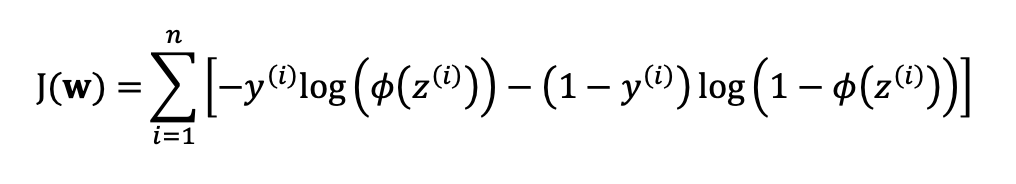

In [ ]:
def loss(x,y,params,bias):
  """
  This function computes the loss described above. The only difference is that 
  the funtion will compute the mean instad of a simple sum 

  @params: x: features 
  @params: y: outputs
  @params: params: weights
  @params: bias: bias
  @return: value of the loss 
  """
  return -np.sum(np.log( y * np.clip(sigmoid(np.dot(x, params) + bias) ,1e-15,1-1e-15) 
                  + (1-y) * np.clip(1-sigmoid(np.dot(x, params) + bias),1e-15,1-1e-15))) 

The following plot shows the sigmoid activation on the x-axis in the range 0 to 1 (the inputs to the sigmoid function were z values in the range –10 to 10) and the associated logistic cost on the y-axis

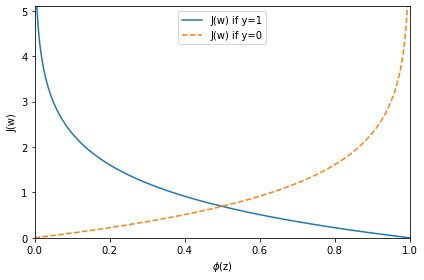

In [ ]:
# print log function 
def cost_1(z):
  return - np.log(sigmoid(z))

def cost_0(z):
  return - np.log(1 - sigmoid(z))

# define the range
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

# impose the limits 
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

# add the axis legend
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')

# add legend
plt.legend(loc='best') 
plt.tight_layout() 

To fit the model is used gradient descent method 

In [ ]:
def fit(x,y):
  """
  It will fit the model using gradient descent method
  
  @params: x: training set features 
  @params: y: training set outputs 
  @return: weights and bias after training
  """

  # hyperparameters

  num_epochs = 500
  learning_rate_min = 5e-5
  learning_rate_max = 2e-4
  learning_rate_decay = 2000

  batch_size = 100
  num_train = x.shape[0]

  # setup
  params = initialize_params(x.shape[1])
  gradients = list()
  bias = 0

  train_history = [loss(x, y, params,bias)]

  # training loop
  t0 = time.time()
  for epoch in tqdm(range(num_epochs)):

    minibatch = np.random.choice(num_train, batch_size)
    x_mini = x[minibatch,:]
    y_mini = y[minibatch]

    # evaluete the gradients
    value = np.dot(x_mini, params) + bias
    y_pred = sigmoid(value)
    gradients =  np.dot(x_mini.T, (y_pred - y_mini))
    bias_gradients = np.sum(y_pred - y_mini)

    # evaluate the learning_rate
    learning_rate = max(learning_rate_min, learning_rate_max * (1 - epoch/learning_rate_decay))
    for i in range(len(params)):

      # update the parameters
      params[i] -= learning_rate * gradients[i]
      
    bias -= learning_rate * bias_gradients
    train_history.append(loss(x, y, params,bias))

  print('train loss: %1.3e' % train_history[-1])
  plt.loglog(train_history, label = 'train loss')

  return [params,bias]

In [ ]:
def prediction(x,params):
  """
  It will return predicted values casted to 0 and 1

  @params: x: features 
  @params: params: [weights, bias]
  """
  w = params[0]
  bias = params[1]

  # evaluate the sigmoid
  z = np.dot(x, w) + bias
  phi = sigmoid(z)
  
  pred = list()
  
  # cast the outputs predicted
  y = valid_set[:,-1]
  for i in range(phi.shape[0]):
    pred.append(1 if phi[i] >= 0.9 else 0)
                
  return pred 

In [ ]:
def logistic_regression(train_set,valid_set):
  """
  Algorithm 
  """
  
  train_set = np.array(train_set)
  valid_set = np.array(valid_set)
  x = train_set[:,:-1]
  y = train_set[:,-1]

  # fit
  params = fit(x,y)

  # test
  x_valid = valid_set[:,:-1]
  pred = prediction(x_valid,params)

  return pred

### Apply the algorithm




  0%|          | 0/500 [00:00<?, ?it/s]

train loss: 1.383e+02


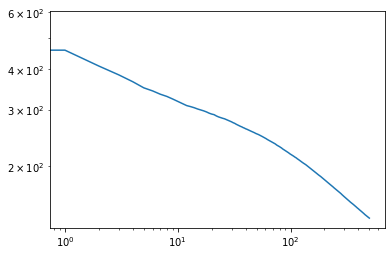

In [ ]:
predictionsLR1 = logistic_regression(training_set1,valid_set)

  0%|          | 0/500 [00:00<?, ?it/s]

train loss: 2.031e+02


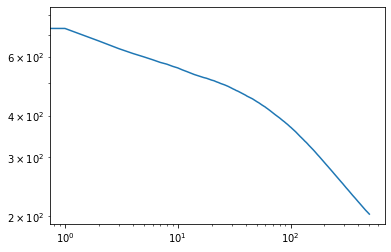

In [ ]:
predictionsLR2 = logistic_regression(training_set2,valid_set)

  0%|          | 0/500 [00:00<?, ?it/s]

train loss: 2.607e+02


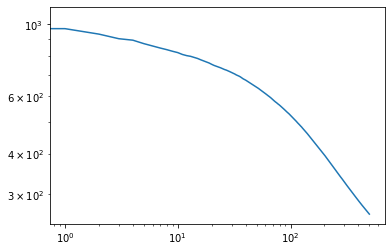

In [ ]:
predictionsLR3 = logistic_regression(training_set3,valid_set)

## **Classification techniques** - K-Nearest Neighbors

Three main steps:
1. calculate Euclidean distance;
2. get nearest neighbours;
3. make predictions.

### Define the distance

There are various kinds of distances, for instance Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. For the euclidean distance, I simply compute the L2 norm of two vectors (the rows of the dataset):

In [ ]:
def euclidean_distance(row1, row2):
  ''' It computes the Euclidean distance between vectors row1 and row2.

  @param: row1 First vector.
  @param: row2 Second vector.  
  '''
  
  distance = 0.0
  for i in range(len(row1)-1): # go up to len(row)-1 because the last element of the row is the output
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

### Get nearest neighbours

The steps are:
1.   take a sample;
2.   compute the distance between such sample and every other sample in the dataset;
3. sort the samples (in descending order) according to the computed distances;
4. select the best k samples (the nearest neighbours).



In [ ]:
def get_neighbors(train_set, sample, k):
  """ It returns a list containing the k nearest neighbours of sample in train.

  @param: train_set The training set from which extracting the neighbours.
  @param: sample The sample to consider; we want its neighbours.
  @param: k The number of nearest neighbours to extract.
  """

  distances = list() # here I store all the distances

  # compute the distances
  for train_row in train_set:
    dist = euclidean_distance(sample, train_row)
    distances.append((train_row, dist)) # in distances I append pairs of values row-distance

  # sort the samples:
  # key is a lambda which is executed prior to make comparisons; so we are sorting
  # the samples by the second (0-indexed) elements of objects in distances (namely, the distances)
  distances.sort(key=lambda tup: tup[1]) 

  # get the neighbours
  neighbors = list()
  for i in range(k):
    neighbors.append(distances[i][0]) # append only the sample (not the distance)

  return neighbors

### Make predictions

It is a classification task: we just have to compute the most frequent class in the neighborood to carry out the prediction:

In [ ]:
def predict_classification(training_set, sample, k):
  '''It provides a prediction for sample using the training_set and the best k neighbours.

  @param: training_set It is the training set to use for providing a prediction for sample.
  @param: sample The sample for which providing the prediction.
  @param: k The hyperparameter of the algorithm; it represents the number of nearest neighbours to use.
  '''

  # get the k-nearest neighbours
  neighbors = get_neighbors(training_set, sample, k)

  # get the classes of the k-nearest neighbours
  output_values = [row[-1] for row in neighbors] # I take row[-1] because the class is the last entry of the row

  # perform the prediction: I take the most frequent class (output value)
  prediction = max(set(output_values), key=output_values.count)
  
  return prediction

### Algorithm

In [ ]:
# KNN Algorithm
def k_nearest_neighbors(training_set, test_set, k):
	"""
	It applies the KNN algorithm to each entry of the test_set using the training_set as training set
	and using k as hyperparameter.

	@param: training_set It is the training set to use.
	@param: test_set It is the test set; this function provides a prediction for each entry of the test_set.
	@param: k It represents the main hyperparameter of the algorithm, namely it says how many nearest neighbours
	to use for computing the prediction.
	"""

	# we return a list of predictions
	predictions = list()
 
	# compute a prediction for each entry of the test_set
	for row in test_set:
		output = predict_classification(training_set, row, k)
		predictions.append(output)
	
	return(predictions)

### Apply the algorithm

In [ ]:
# hyperparameter k
k = 10

# apply random under sampling to the test set
test_set1 = RUS(ratio1, valid_set)
test_set2 = RUS(ratio2, valid_set)
test_set3 = RUS(ratio3, valid_set)

train_fraud len        :  155
train_not_fraud len    :  85288
new train_not_fraud len:  155
new training set len   :  310


train_fraud len        :  155
train_not_fraud len    :  85288
new train_not_fraud len:  300
new training set len   :  455


train_fraud len        :  155
train_not_fraud len    :  85288
new train_not_fraud len:  465
new training set len   :  620




In [ ]:
# convert the valid set into a list
validation_set = list()
for sample in valid_set:
  validation_set.append(sample)

In [ ]:
# proportion 1: 50:50
predictionsKNN1 = k_nearest_neighbors(training_set1, validation_set, k)

In [ ]:
# proportion 2: 34:66
predictionsKNN2 = k_nearest_neighbors(training_set2, validation_set, k)

In [ ]:
# proportion 3: 25:75
predictionsKNN3 = k_nearest_neighbors(training_set3, validation_set, k)

## **Classification techniques** - Naive Bayes

Five main steps:

1. separate all the rows by class (divide the dataset in more datasets, one for each class);
2. summarize dataset, namely compute mean, variance and cardinality of each column of the dataset;
3. summarize the dataset by class, namely do the same as 2. but for each dataset created at 1.;
4. define the probability density function with which modelling the distribution of each column for each class (strong assumption);
5. compute the class probabilities by applying the Bayes theorem (simplified).




The main goal is to apply the formula:

$p(y_i|x_1,x_2,...,x_n) = p(x_1|y_i)p(x_2|y_i)...p(x_n|y_i)p(y_i)$

which is the Bayes theorem simplified with two assumptions:
1. the variables($x_j$) are independent;
2. since the denominator, under 1., becomes a constant ($p(x_1)p(x_2)...p(x_n)$), we can remove it, since we care only about the maximum value, and not about the probability itself.

### Separate by class

We can create a dictionary object where each key is the class value and each object is a list of all the records with that class value; the structure is:

separated = {class_value1: [entry1, entry2,...], class_value2: [entry1, entry2,...],}

where class_valuei represents the i-th class value, and the list contains all entries of the dataset with that class value.

In [ ]:
def separate_by_class(dataset):
  """
  It returns a dictionary whose keys are the class values and whose objects are lists
  of entries of the dataset with the proper class value.
  
  @param: dataset It is a list of lists, where each inner list is a sample.
  """

  separated = dict()

  # for each entry of the dataset, add it to the list associated to its class value
  for i in range(len(dataset)):
    vector = dataset[i]
    class_value = vector[-1] # the class is in the last column

    # if the class value is not present in the dictionary, add it as a key along with a new list
    if (class_value not in separated):
      separated[class_value] = list()

    # add the entry to the dictionary
    separated[class_value].append(vector)

  return separated

### Summarize dataset

In order to compute all the probabilities we need to make a prediction, we need to know mean, standard deviation and cardinality of each column:

In [ ]:
# mean
def mean(numbers):
  '''It calculates the mean of a list of numbers.
  
  @param: numbers It is a list of numbers.'''

  return sum(numbers)/float(len(numbers))

In [ ]:
# standard deviation
def stdev(numbers):
  '''It calculates the standard deviation of a list of numbers.
  
  @param: numbers It is a list of numbers.'''

  avg = mean(numbers)
  variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
  return sqrt(variance)

In [ ]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
  """
  It returns a list of triples. The returned summaries contains one triple for each
  column of dataset (except for the last column); each triple contains (mean, std, len).
  
  @param: dataset It is a list of lists, where each inner list is a sample of the dataset.
  """
  
  # through the asterisk and the zip function I can create an iterable of lists
  # whose elements are the columns of the dataset
  summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]

  # summaries is a list; I delete the last element, which are the statistics for the class column
  del(summaries[-1])
  
  return summaries

### Summarize data by class

We require statistics from our training dataset organized by class:

In [ ]:
def summarize_by_class(dataset):
  """
  It returns a dictionary where the keys are the class values and the objects are
  lists of triples. So, to each class value (key) we associate a list of triples, where
  each triple contains (mean,std,len) of a column. The cardinality of each list is equal
  to the number of columns (features xi) of the dataset.

  @param: dataset It is a list of lists, where each inner list is a sample.
  """

  # get a dictionary class_value -> entries
  separated = separate_by_class(dataset)

  summaries = dict()

  # for each list of entries of a class value, compute the statistics and store them into summaries
  for class_value, rows in separated.items():
    summaries[class_value] = summarize_dataset(rows)
    
  return summaries

### Probability Density Function

Since calculating the probability of observing a certain real-value given the label is difficult, we assume that the distribution is known.

In [ ]:
def calculate_probability(x, mean, stdev):
  """
  It computes the Gaussian probability distribution function for a value x
  given the mean and the standard deviation.

  @param: mean It is the mean of the distribution.
  @param: stdev It is the standard deviation of the distribution.
  """
  
  exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
  return (1 / (sqrt(2 * pi) * stdev)) * exponent

### Class Probabilities

Given a certain sample for which we want to compute the most likely label, we compute the value of:

$p(y_i|x_1,x_2,...,x_n) = p(x_1|y_i)p(x_2|y_i)...p(x_n|y_i)p(y_i)$

for each of the possible class values.

In [ ]:
def calculate_class_probabilities(summaries, sample):
  """
  It computes a dictionary whose keys are the class values yi and whose objects are
  the values of p(yi|x1,x2,...xn). To do so, it applies the Bayes formula under
  the independency assumption of the features.

  @param: summaries It is a dictionary whose keys are the class values and whose objects
          are lists of triples, where each triple represents the statistics of a column.
  @param: sample It is one sample, one row of the original dataset on which we want to
          make a prediction.
  """

  # compute the total number of rows in the dataset
  total_rows = sum([summaries[class_value][0][2] for class_value in summaries])

  probabilities = dict()

  # for each class value yi, compute the value of p(yi|x1,x2,...xn) and add it to probabilities.
  for class_value, class_summaries in summaries.items():
    
    # p(yi) = n_samples_of_the_class / total_n_of_samples
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)

    # for each of the columns (feature xi) of the dataset (the last was previously removed)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]

      # the probability p(yi|x1,x2,...,xn)=p(yi)*p(x1|yi)*p(x2|yi)*...*p(xn|yi)
      probabilities[class_value] *= calculate_probability(sample[i], mean, stdev)
   
  # we return a dictionary that contains, for each class value, the probability:
  # class_value yi -> p(yi|x1,x2,...xn)
  return probabilities

### Make predictions

Select the class with highest probability to make a prediction:

In [ ]:
# Predict the class for a given sample
def predict(summaries, sample):
	# compute the possibility yi -> p(yi|x1,x2,...xn) for each class yi
	probabilities = calculate_class_probabilities(summaries, sample)
	best_label, best_prob = None, -1

  # extract the class with maximum value
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
			
	return best_label

### Algorithm

Compute a prediction for each sample in the test set; the training set is used only at the beginning to learn the distributions of all the $p(y_i)$ and $p(x_j|y_i)$.

In [ ]:
# Naive Bayes Algorithm
def naive_bayes(training_set, test_set):

  # I compute all the statistics needed on the training_set
  summarize = summarize_by_class(training_set)

  predictions = list()

  # for each row in the test_set I compute the prediction and I append it in predictions list
  for row in test_set:
    output = predict(summarize, row)
    predictions.append(output)

  # return a list with all the predictions
  return(predictions)

### Apply the algorithm

In [ ]:
# proportion 1: 50:50
predictionsNB1 = naive_bayes(training_set1, valid_set)

In [ ]:
# proportion 2: 34:66
predictionsNB2 = naive_bayes(training_set2, valid_set)

In [ ]:
# proportion 3: 25:75
predictionsNB3 = naive_bayes(training_set3, valid_set)

## Performance evaluation

Calculete the parametes 

In [ ]:
def collect_rates(y_valid,prediction1,prediction2,prediction3):
  """
  This function returs the number of TP,TN,FP,FN

  @params: y_valid: expected output
  @params: prediction1: output predicted by the model trained with the ratio 50:50
  @params: prediction2: output predicted by the model trained with the ratio 34:64
  @params: prediction3: output predicted by the model trained with the ratio 25:75
  @return: list[TP,TN,FP,FN]
  """

  truePositive = [0,0,0]
  trueNegative = [0,0,0]
  falsePositive = [0,0,0]
  falseNegative = [0,0,0]

  for i in range(len(y_valid)):

    if (y_valid[i] == 1) and (prediction1[i]== 1 ):
      truePositive[0] += 1
    if (y_valid[i] == 0) and (prediction1[i] == 0):
      trueNegative[0] += 1
    if (y_valid[i] == 0) and (prediction1[i]== 1 ):
      falsePositive[0] += 1
    if (y_valid[i] == 1) and (prediction1[i] == 0):
      falseNegative[0] += 1

    if (y_valid[i] == 1) and (prediction2[i]== 1 ):
      truePositive[1] += 1
    if (y_valid[i] == 0) and (prediction2[i] == 0):
      trueNegative[1] += 1
    if (y_valid[i] == 0) and (prediction2[i]== 1 ):
      falsePositive[1] += 1
    if (y_valid[i] == 1) and (prediction2[i] == 0):
      falseNegative[1] += 1

    if (y_valid[i] == 1) and (prediction3[i]== 1 ):
      truePositive[2] += 1
    if (y_valid[i] == 0) and (prediction3[i] == 0):
      trueNegative[2] += 1
    if (y_valid[i] == 0) and (prediction3[i]== 1 ):
      falsePositive[2] += 1
    if (y_valid[i] == 1) and (prediction3[i] == 0):
      falseNegative[2] += 1
  
  return np.array([truePositive,trueNegative,falsePositive,falseNegative])

In [ ]:
def collect_rates_single_prediction(y_valid,prediction):
  """
  This function returs the number of TP,TN,FP,FN

  @params: y_valid: expected output
  @params: prediction1: output predicted by the model trained with the ratio 50:50
  @params: prediction2: output predicted by the model trained with the ratio 34:64
  @params: prediction3: output predicted by the model trained with the ratio 25:75
  @return: list[TP,TN,FP,FN]
  """

  truePositive = 0
  trueNegative = 0
  falsePositive = 0
  falseNegative = 0

  for i in range(len(y_valid)):

    if (y_valid[i] == 1) and (prediction[i]== 1 ):
      truePositive += 1
    if (y_valid[i] == 0) and (prediction[i] == 0):
      trueNegative += 1
    if (y_valid[i] == 0) and (prediction[i]== 1 ):
      falsePositive += 1
    if (y_valid[i] == 1) and (prediction[i] == 0):
      falseNegative += 1
  
  return [truePositive,trueNegative,falsePositive,falseNegative]

In [ ]:
# the following code has been used for evaluating KNN algorithms when it was 
  #tested with subsets of the validation set  

def collect_rates_test_subsets(test_set1,test_set2,test_set3,prediction1,prediction2,prediction3):
  """
  This function returs the number of TP,TN,FP,FN

  @params: test_set1: expected output for prefiction1
  @params: test_set2: expected output for prefiction2
  @params: test_set3: expected output for prefiction3
  @params: prediction1: output predicted by the model trained with the ratio 50:50
  @params: prediction2: output predicted by the model trained with the ratio 34:64
  @params: prediction3: output predicted by the model trained with the ratio 25:75
  @return: list[TP,TN,FP,FN]
  """
  #save just the last column

  truePositive = [0,0,0]
  trueNegative = [0,0,0]
  falsePositive = [0,0,0]
  falseNegative = [0,0,0]

  for i in range(len(test_set1)):

    if (test_set1[i][-1] == 1) and (prediction1[i]== 1 ):
      truePositive[0] += 1
    if (test_set1[i][-1] == 0) and (prediction1[i] == 0):
      trueNegative[0] += 1
    if (test_set1[i][-1] == 0) and (prediction1[i]== 1 ):
      falsePositive[0] += 1
    if (test_set1[i][-1] == 1) and (prediction1[i] == 0):
      falseNegative[0] += 1

  for i in range(len(test_set2)):

    if (test_set2[i][-1] == 1) and (prediction2[i]== 1 ):
      truePositive[1] += 1
    if (test_set2[i][-1] == 0) and (prediction2[i] == 0):
      trueNegative[1] += 1
    if (test_set2[i][-1] == 0) and (prediction2[i]== 1 ):
      falsePositive[1] += 1
    if (test_set2[i][-1] == 1) and (prediction2[i] == 0):
      falseNegative[1] += 1

  for i in range(len(test_set3)):
    if (test_set3[i][-1] == 1) and (prediction3[i]== 1 ):
      truePositive[2] += 1
    if (test_set3[i][-1] == 0) and (prediction3[i] == 0):
      trueNegative[2] += 1
    if (test_set3[i][-1] == 0) and (prediction3[i]== 1 ):
      falsePositive[2] += 1
    if (test_set3[i][-1] == 1) and (prediction3[i] == 0):
      falseNegative[2] += 1
  
  return np.array([truePositive,trueNegative,falsePositive,falseNegative])

In [ ]:
y_valid = valid_set[:,-1]
performancesLR = collect_rates(y_valid,predictionsLR1,predictionsLR2,predictionsLR3)
performancesKNN= collect_rates(y_valid,predictionsKNN1,predictionsKNN2,predictionsKNN3)
performancesNB = collect_rates(y_valid,predictionsNB1,predictionsNB2,predictionsNB3)

In [ ]:
algorithms = ["Logistic Regression", "K-Nearest Neighbours", "Naive Bayes"]
ratio = ["ratio 50:50", "ratio 34:66", "ratio 25:75"]
values = ["TP", "TN", "FP", "FN"]

print("\033[1m" + algorithms[0] + "\033[0m")
# iteration for each ratio
for i in range(len(performancesLR[0])):
  print(ratio[i])
  # iteration for each parameter
  for j in range(len(performancesLR)):
    print(values[j] + " : %d" % performancesLR[j][i])
  print('\n')

print("\033[1m" + algorithms[1] + "\033[0m")
for i in range(len(performancesKNN[0])):
  print(ratio[i])
  for j in range(len(performancesKNN)):
    print(values[j] + " : %d" % performancesKNN[j][i])
  print('\n')

print("\033[1m" + algorithms[2] + "\033[0m")
for i in range(len(performancesNB[0])):
  print(ratio[i])
  for j in range(len(performancesNB)):
    print(values[j] + " : %d" % performancesNB[j][i])
  print('\n')

Logistic Regression
ratio 50:50
TP : 128
TN : 85125
FP : 163
FN : 27


ratio 34:66
TP : 124
TN : 85191
FP : 97
FN : 31


ratio 25:75
TP : 124
TN : 85252
FP : 36
FN : 31


K-Nearest Neighbours
ratio 50:50
TP : 138
TN : 84309
FP : 979
FN : 17


ratio 34:66
TP : 134
TN : 85017
FP : 271
FN : 21


ratio 25:75
TP : 132
TN : 85110
FP : 178
FN : 23


Naive Bayes
ratio 50:50
TP : 135
TN : 82960
FP : 2328
FN : 20


ratio 34:66
TP : 134
TN : 82781
FP : 2507
FN : 21


ratio 25:75
TP : 136
TN : 82801
FP : 2487
FN : 19




### Accuracy 
Defined as the ratio of the total number of predicted transactions that are correct

In [ ]:
def accuracy(TP,TN,FP,FN):
  return ((TP + TN) / (TP + FP + TN + FN) if (TP + FP + TN + FN) != 0 else 0)

### Sensitivity 

The proportion of positive observed values correctly predicted as positive. It is also called as True Positive Rate (TPR) or Recall

In [ ]:
def sensitivity(TP,FN):
  return (TP/(TP+FN) if ((TP+FN)) !=0 else 0)

### Specificity 
Defined as, with how much accuracy the negative (legitimate) cases are classified and, in our case, it gives the accuracy on prediction of legitimate transactions classification. It is also called as True Negative Rate (TNR)

In [ ]:
def specificity(TN,FP):
  return (TN/(FP+TN) if (FP+TN)!=0 else 0)

### Precision 
The proportion of positive (fraud) predictions that are actually correct 

In [ ]:
def precision(TP,FP):
  return (TP/(TP+FP) if (TP+FP)!=0 else 0)

### F-measure 
It gives the accuracy of the test which means that it gives the accuracy of experiments performed. It uses the both precision and recall to compute its value. The best value for f1 score is considered at value 1

In [ ]:
def F_measure(precision,sensitivity):
  return ((2 * ((precision * sensitivity)/(precision + sensitivity))) if (precision + sensitivity) !=0 else 0)

### Area under curve (AUC) 

It represents degree or measure of separability that is how much model is capable of differentiating between the classes

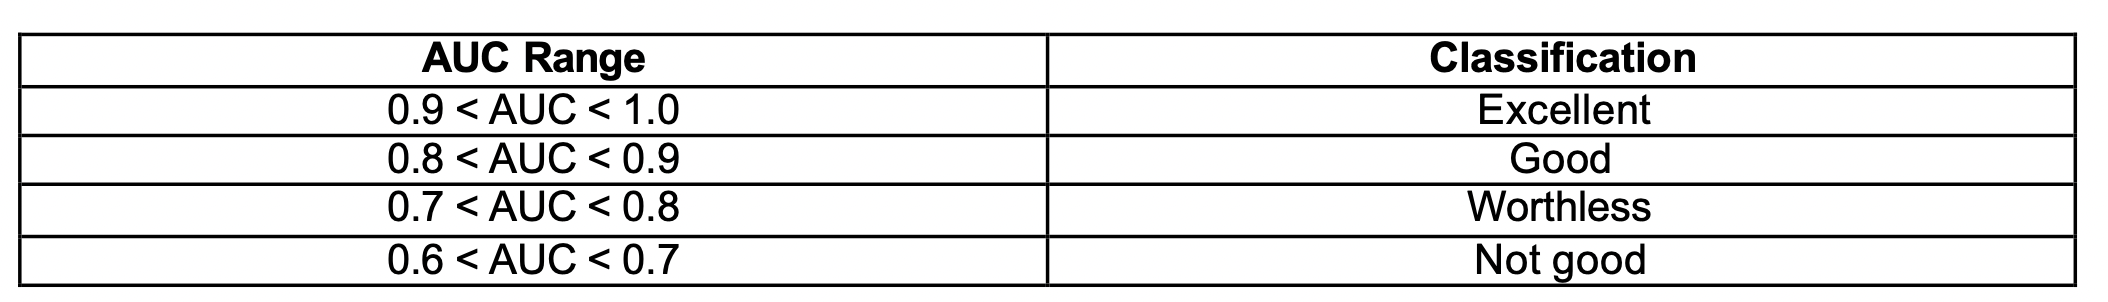

In [ ]:
def AUC(sensitivity, specificity):
  return (0.5 * (sensitivity + specificity))

Summary :

In [ ]:
logisticRegression = list()
kNearestNeighbours = list()
naiveBayes = list()

print("\033[1m" + algorithms[0] + "\033[0m")
for i in range(3):
  print(ratio[i])
  acc = accuracy(performancesLR[0][i], performancesLR[1][i], performancesLR[2][i], performancesLR[3][i]),
  sens = sensitivity(performancesLR[0][i], performancesLR[3][i]),
  spec = specificity(performancesLR[1][i], performancesLR[2][i]),
  prec = precision(performancesLR[0][i], performancesLR[2][i])
  f_me = F_measure(prec,sens[0])
  auc = AUC(sens[0],spec[0])
  
  print('Accuracy    ' + '{:.1%}'.format(acc[0]))
  print('Sensitivity ' + '{:.1%}'.format(sens[0]))
  print('Specificity ' + '{:.1%}'.format(spec[0]))
  print('Precision   ' + '{:.1%}'.format(prec))
  print('F_measure   ' + '{:.1%}'.format(f_me))
  print('AUC         ' + '{:.1%}'.format(auc) + '\n')

  logisticRegression.append([acc[0], sens[0],spec[0],prec,f_me,auc])

print("\033[1m" + algorithms[1] + "\033[0m")
for i in range(3):
  print(ratio[i])
  acc = accuracy(performancesKNN[0][i], performancesKNN[1][i], performancesKNN[2][i], performancesKNN[3][i]),
  sens = sensitivity(performancesKNN[0][i], performancesKNN[3][i]),
  spec = specificity(performancesKNN[1][i], performancesKNN[2][i]),
  prec = precision(performancesKNN[0][i], performancesKNN[2][i])
  f_me = F_measure(prec,sens[0])
  auc = AUC(sens[0],spec[0])
  
  print('Accuracy    ' + '{:.1%}'.format(acc[0]))
  print('Sensitivity ' + '{:.1%}'.format(sens[0]))
  print('Specificity ' + '{:.1%}'.format(spec[0]))
  print('Precision   ' + '{:.1%}'.format(prec))
  print('F_measure   ' + '{:.1%}'.format(f_me))
  print('AUC         ' + '{:.1%}'.format(auc) + '\n')

  kNearestNeighbours.append([acc[0], sens[0],spec[0],prec,f_me,auc])

print("\033[1m" + algorithms[2] + "\033[0m")
for i in range(3):
  print(ratio[i])
  acc = accuracy(performancesNB[0][i], performancesNB[1][i], performancesNB[2][i], performancesNB[3][i]),
  sens = sensitivity(performancesNB[0][i], performancesNB[3][i]),
  spec = specificity(performancesNB[1][i], performancesNB[2][i]),
  prec = precision(performancesNB[0][i], performancesNB[2][i])
  f_me = F_measure(prec,sens[0])
  auc = AUC(sens[0],spec[0])
  
  print('Accuracy    ' + '{:.1%}'.format(acc[0]))
  print('Sensitivity ' + '{:.1%}'.format(sens[0]))
  print('Specificity ' + '{:.1%}'.format(spec[0]))
  print('Precision   ' + '{:.1%}'.format(prec))
  print('F_measure   ' + '{:.1%}'.format(f_me))
  print('AUC         ' + '{:.1%}'.format(auc) + '\n')

  naiveBayes.append([acc[0], sens[0],spec[0],prec,f_me,auc])


Logistic Regression
ratio 50:50
Accuracy    99.8%
Sensitivity 82.6%
Specificity 99.8%
Precision   44.0%
F_measure   57.4%
AUC         91.2%

ratio 34:66
Accuracy    99.9%
Sensitivity 80.0%
Specificity 99.9%
Precision   56.1%
F_measure   66.0%
AUC         89.9%

ratio 25:75
Accuracy    99.9%
Sensitivity 80.0%
Specificity 100.0%
Precision   77.5%
F_measure   78.7%
AUC         90.0%

K-Nearest Neighbours
ratio 50:50
Accuracy    98.8%
Sensitivity 89.0%
Specificity 98.9%
Precision   12.4%
F_measure   21.7%
AUC         93.9%

ratio 34:66
Accuracy    99.7%
Sensitivity 86.5%
Specificity 99.7%
Precision   33.1%
F_measure   47.9%
AUC         93.1%

ratio 25:75
Accuracy    99.8%
Sensitivity 85.2%
Specificity 99.8%
Precision   42.6%
F_measure   56.8%
AUC         92.5%

Naive Bayes
ratio 50:50
Accuracy    97.3%
Sensitivity 87.1%
Specificity 97.3%
Precision   5.5%
F_measure   10.3%
AUC         92.2%

ratio 34:66
Accuracy    97.0%
Sensitivity 86.5%
Specificity 97.1%
Precision   5.1%
F_measure   9.6%


The plots below show performance evaluations of the three algorithms separately

Plot the results 



*   RUS 1 -> Random Under Sampling with ratio 50:50
*   RUS 2 -> Random Under Sampling with ratio 34:66
*   RUS 3 -> Random Under Sampling with ratio 25:75




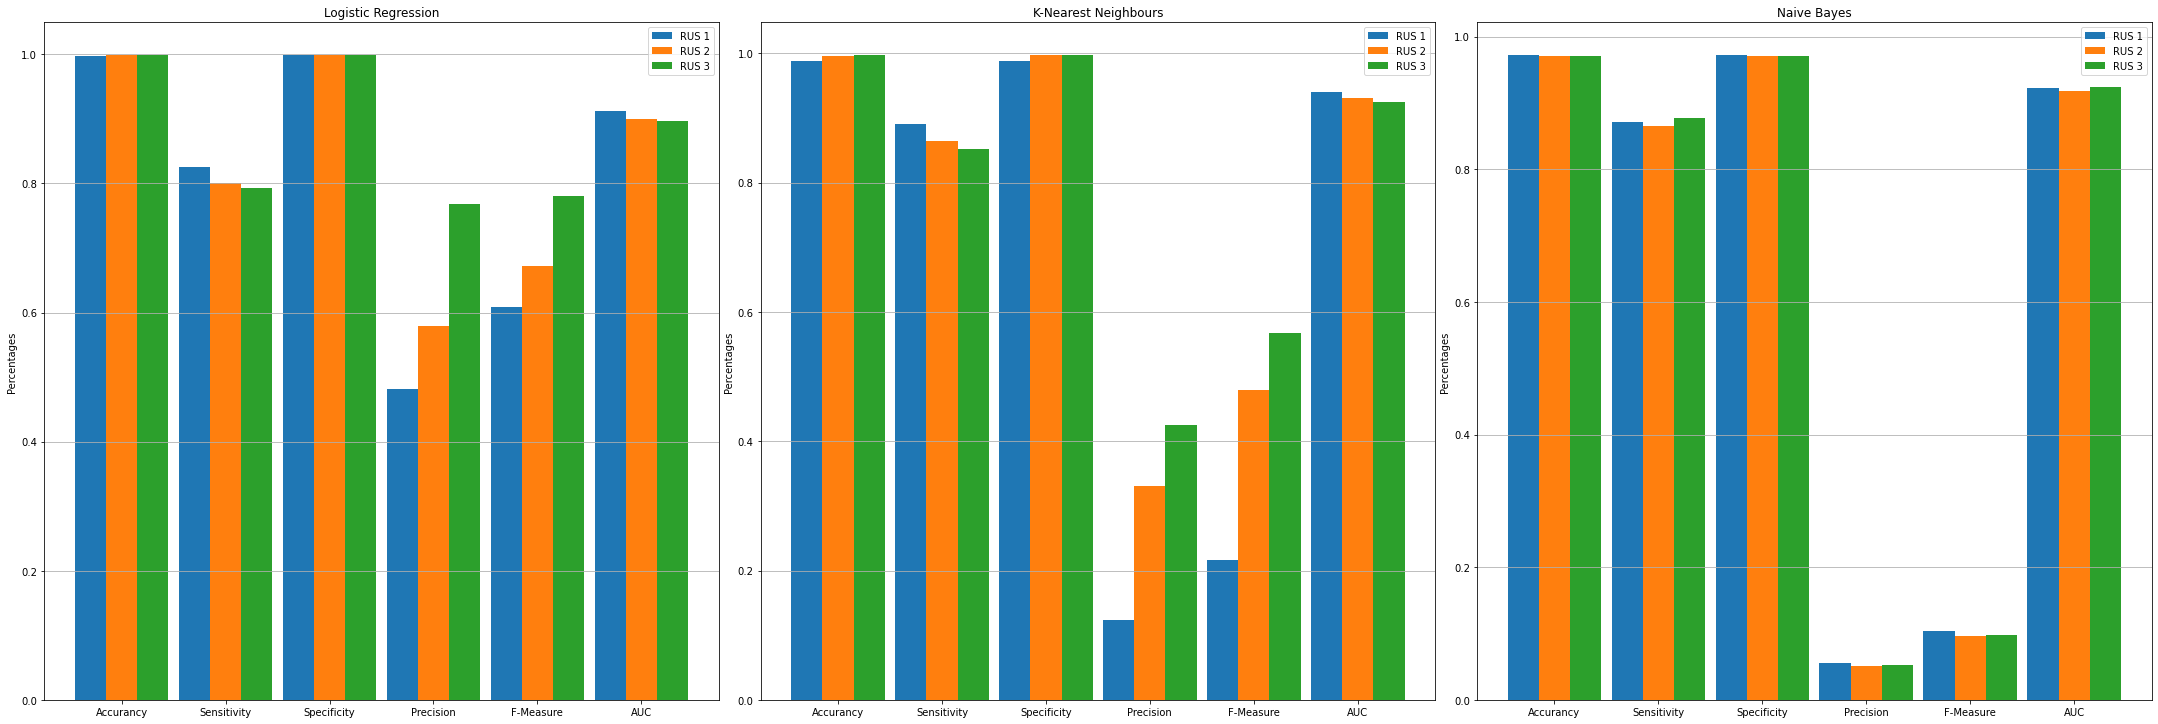

In [ ]:
labels = ['Accurancy', 'Sensitivity', 'Specificity', 'Precision', 'F-Measure', 'AUC']

RUS1 = [logisticRegression[0], kNearestNeighbours[0], naiveBayes[0]]
RUS2 = [logisticRegression[1], kNearestNeighbours[1], naiveBayes[1]]
RUS3 = [logisticRegression[2], kNearestNeighbours[2], naiveBayes[2]]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(1,3, figsize=(30,10))
fig.tight_layout() 

for i in range(3):
  rects1 = ax[i].bar(x - width, RUS1[i], width, label='RUS 1')
  rects2 = ax[i].bar(x, RUS2[i], width, label='RUS 2')
  rects3 = ax[i].bar(x + width, RUS3[i], width, label='RUS 3')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax[i].set_ylabel('Percentages')
  ax[i].set_title(algorithms[i])
  ax[i].set_xticks(x)
  ax[i].set_xticklabels(labels)
  ax[i].legend()
  ax[i].yaxis.grid(True) # plot the grid


# Additional Features 


## Logistic Regression with `sklearn.linear_model ` library

In [ ]:
from sklearn.linear_model import LogisticRegression

def log_reg(train_set,valid_set):
 
  # for convenience we convert the lists to arrays
  train_set = np.array(train_set)
  valid_set = np.array(valid_set)

  # create an instance of the model
  logisticRegr = LogisticRegression()

  # fit the model 
  logisticRegr.fit(train_set[:,:-1], train_set[:,-1])

  # test 
  predictions = logisticRegr.predict(valid_set[:,:-1])

  return predictions

## Evaluate algorithm through cross-validation

**Cross validation:**

Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

**k-fold cross-validation:**

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. k = 10 is usually used.

Create functions for evaluating the algorithm:

In [ ]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
  '''It returns the n_folds folds.
  
  @param: dataset It is the dataset to split.
  @param: n_folds The number of folds to create.
  '''

  # the returned value will be a list of lists (folds)
  dataset_split = list()

  # create a list from the dataset
  dataset_copy = dataset.tolist()

  # compute the number of elements in each fold
  fold_size = int(len(dataset) / n_folds)

  # build each fold by popping values from the copy of the dataset
  for _ in range(n_folds):
  	fold = list()
    # build the fold
  	while len(fold) < fold_size:
  		index = randrange(len(dataset_copy))
  		fold.append(dataset_copy.pop(index))
    # append the fold
  	dataset_split.append(fold)
   
  return dataset_split

In [ ]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	"""
	It computes the accuracy between the two provided lists.
	Accuracy := n_correct / n_actual

	@param: actual It is the list with all the actual values.
	@param: predicted It is the list with all the predicted values.
	"""

	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	
	return correct / float(len(actual)) * 100.0

In [ ]:
def compute_metrics(actual, predicted):
	"""
	It computes the metrics required.

	@param: actual It is the list with all the actual values.
	@param: predicted It is the list with all the predicted values.

	returns [acc,spec,sens,prec,f_meas,auc]
	"""

	[TP,TN,FP,FN]=collect_rates_single_prediction(actual,predicted)
	acc = accuracy(TP,TN,FP,FN)
	spec = specificity(TN,FP)
	sens = sensitivity(TP,FN)
	prec = precision(TP,FP)
	f_meas = F_measure(prec,sens)
	auc = AUC(sens, spec)
 
	return [acc,sens,spec,prec,f_meas,auc]

In [ ]:
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
  '''It returns a list of accuracies, each of them computed on a certain fold.
  
  @param: dataset It is the dataset on which evaluating the algorithm.
  @param: algorithm It is the algorithm to evaluate; it is a lambda.
  @param: n_folds It represents the number of folds on which divide the dataset.
  @param: args It contains parameters of the algorithm (k in the case of KNN).
  '''

  # split the dataset into n_folds
  folds = cross_validation_split(dataset, n_folds)

  # this list contains the accuracy of the algorithm computed for each fold at a time
  scores = list()

  # for each fold compute the accuracy
  for fold in folds:
    training_set = list(folds) # copy the dataset
    training_set.remove(fold) # remove the current fold
    training_set = sum(training_set, []) # merge all the folds in training_set in one list
    test_set = list()

    # build the test_set by removing the class in each row of the current fold
    for row in fold:
      row_copy = list(row)
      test_set.append(row_copy)
      row_copy[-1] = None

    # compute the accuracy and append it to scores
    predicted = algorithm(training_set, test_set, *args)
    actual = [row[-1] for row in fold] # actual values are in the last column of the fold

    # compute the accuracy
    [acc,spec,sens,prec,f_meas,auc] = compute_metrics(actual, predicted)    
    scores.append([acc,spec,sens,prec,f_meas,auc])              

  return scores

Evaluate LR algorithm:

In [ ]:
n_folds = 3
rus_dataset = (RUS_array(0.5, dataset.to_numpy()))

scores = evaluate_algorithm(rus_dataset,log_reg,n_folds)

acc=0
sens=0
spec=0
prec=0
fmeas=0
auc=0
for score in scores:
  acc += score[0]
  sens += score[1]
  spec += score[2]
  prec += score[3]
  fmeas += score[4]
  auc += score[5]

print('Mean Accuracy:    %.3f%%' % (acc*100/float(len(scores))))
print('Mean Sensitivity: %.3f%%' % (sens*100/float(len(scores))))
print('Mean Specificity: %.3f%%' % (spec*100/float(len(scores))))
print('Mean Precision:   %.3f%%' % (prec*100/float(len(scores))))
print('Mean Fmeas:       %.3f%%' % (fmeas*100/float(len(scores))))
print('Mean AUC:         %.3f%%' % (auc*100/float(len(scores))))

Mean Accuracy:    92.683%
Mean Sensitivity: 92.275%
Mean Specificity: 93.706%
Mean Precision:   96.558%
Mean Fmeas:       94.353%
Mean AUC:         92.991%


Evaluate KNN algorithm:

In [ ]:
n_folds = 3
rus_dataset = RUS_array(0.5, dataset.to_numpy())

# I pass the result of the RUS function on the dataset
scores = evaluate_algorithm(rus_dataset,k_nearest_neighbors,n_folds,k)

acc=0
sens=0
spec=0
prec=0
fmeas=0
auc=0
for score in scores:
  acc += score[0]
  sens += score[1]
  spec += score[2]
  prec += score[3]
  fmeas += score[4]
  auc += score[5]


print('Mean Accuracy: %.3f%%' % (acc*100/float(len(scores))))
print('Mean sensitivity: %.3f%%' % (sens*100/float(len(scores))))
print('Mean specificity: %.3f%%' % (spec*100/float(len(scores))))
print('Mean precision: %.3f%%' % (prec*100/float(len(scores))))
print('Mean fmeas: %.3f%%' % (fmeas*100/float(len(scores))))
print('Mean auc: %.3f%%' % (auc*100/float(len(scores))))

Mean Accuracy: 66.125%
Mean sensitivity: 80.484%
Mean specificity: 37.384%
Mean precision: 72.000%
Mean fmeas: 76.004%
Mean auc: 58.934%


Evaluate NB algorithm:

In [ ]:
n_folds = 3
rus_dataset = RUS_array(0.5, dataset.to_numpy())

# I pass the result of the RUS function on the dataset
scores = evaluate_algorithm(rus_dataset, naive_bayes, n_folds)

acc=0
sens=0
spec=0
prec=0
fmeas=0
auc=0
for score in scores:
  acc += score[0]
  sens += score[1]
  spec += score[2]
  prec += score[3]
  fmeas += score[4]
  auc += score[5]


print('Mean Accuracy: %.3f%%' % (acc*100/float(len(scores))))
print('Mean sensitivity: %.3f%%' % (sens*100/float(len(scores))))
print('Mean specificity: %.3f%%' % (spec*100/float(len(scores))))
print('Mean precision: %.3f%%' % (prec*100/float(len(scores))))
print('Mean fmeas: %.3f%%' % (fmeas*100/float(len(scores))))
print('Mean auc: %.3f%%' % (auc*100/float(len(scores))))

Mean Accuracy: 89.566%
Mean sensitivity: 86.675%
Mean specificity: 95.487%
Mean precision: 97.486%
Mean fmeas: 91.746%
Mean auc: 91.081%


## Neural Network

### Data Division

Store the data in a matrix and the labels (0 - 1) in a vector

In [ ]:
labels_train1 = train_set1[:,30]
x_data1 = train_set1[:,:30].transpose() 

labels_train1.shape, x_data1.shape

((674,), (30, 674))

In [ ]:
labels_train2 = train_set2[:,30]
x_data2 = train_set2[:,:30].transpose() 

labels_train2.shape, x_data2.shape

((510,), (30, 510))

In [ ]:
labels_train3 = train_set3[:,30]
x_data3 = train_set3[:,:30].transpose() 

labels_train3.shape, x_data3.shape

((449,), (30, 449))

In [ ]:
labels_valid = valid_set[:,30]
x_data_valid = valid_set[:,:30].transpose() 

labels_valid.shape, x_data_valid.shape

((85443,), (30, 85443))

Create a [one-hot](https://en.wikipedia.org/wiki/One-hot) representation of the labels, that is a matrix where each row corresponds to a class (i.e. a digit).
the entries of the matrix are 1 if the sample corresponds to that digit, 0 otherwise

In [ ]:
y_data1 = np.zeros((2, labels_train1.shape[0]))
for i in range(2):
  y_data1[i, labels_train1==i] = 1

In [ ]:
y_data2 = np.zeros((2, labels_train2.shape[0]))
for i in range(2):
  y_data2[i, labels_train2==i] = 1

In [ ]:
y_data3 = np.zeros((2, labels_train3.shape[0]))
for i in range(2):
  y_data3[i, labels_train3==i] = 1

In [ ]:
y_data_valid = np.zeros((2, labels_valid.shape[0]))
for i in range(2):
  y_data_valid[i, labels_valid==i] = 1

Check that the matrix has exactly one element "1" in each column.

In [ ]:
row_sums = np.sum(y_data1, axis = 0)
row_sums.min(), row_sums.max()

(1.0, 1.0)

In [ ]:
y_data1.shape, y_data2.shape, y_data3.shape

((2, 674), (2, 510), (2, 449))

### ANN training


Initialize the parameters with Xavier Uniform initialization 

In [ ]:
def initialize_params_ann(layers_size):
  np.random.seed(0)
  params = list()
  for i in range(len(layers_size) - 1):
    params.append(np.random.uniform(- np.sqrt(6 / (layers_size[i] + layers_size[i+1])), np.sqrt(6 / (layers_size[i] + layers_size[i+1])) ,(layers_size[i+1], layers_size[i])))
    params.append(np.zeros((layers_size[i+1],1)))
  return params

Implement a feedforward ANN with tanh activation function.

To the last layer of the ANN, we apply a *soft-max* layer. If $z_1, \dots, z_n$ are the activations of the last layer neurons, the soft-max layer produces $\hat{z}_1, \dots, \hat{z}_n$, defined as
$$
\hat{z}_i = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$
In this manner the outputs of the ANN satisfy by construction:
- $\hat{z}_i \in [0,1]$
- $\sum_{j=1}^n \hat{z}_j = 1$

Therefore, they can be intepreted as probabilities.

When the ANN will be trained, we will take the digit corresponding the the hightest proabability as prediction of the model.

In [ ]:
def ANN(x, params):
  """
  It calculates the predictions
  """
  W = params[0::2]
  b = params[1::2]
  layer = x 
  for i in range(len(W)):
    layer = W[i] @ layer - b[i]
    if i < len(W) - 1:
      layer = jnp.tanh(layer)
  layer_exp = jnp.exp(layer)
  return layer_exp / jnp.sum(layer_exp, axis = 0)

In [ ]:
def cross_entropy(x, y, params):
  """
  It calculates the cross entropy that is the loss function of the neural network 
  """
  y_appr = ANN(x, params)
  return - jnp.mean(jnp.sum(y*jnp.log(y_appr), axis=0))

In [ ]:
def evaluations(x, y, params):
  """
  It allows to calculate correctenss of predictions 
  """

  digit_appr = jnp.argmax(ANN(x, params), axis = 0)
  digit      = jnp.argmax(y, axis = 0)
  
  TP = jnp.sum(digit_appr * digit )
  TN = jnp.sum((1- digit_appr)* (1-digit ))
  FP = jnp.sum((1 - digit) * (digit_appr))
  FN = jnp.sum((digit ) * (1- digit_appr))

  return [TP,TN,FP,FN]

In [ ]:
layers_size = [30, 20, 10, 2]
params = initialize_params_ann(layers_size)

print('intial cross-entropy: %f' % cross_entropy(x_data_valid, y_data_valid, params))

X entropy: 0.770278


The ANN will be trained with three hidden layers with 20, 10 neurons each.

Use 1000 epochs of the RMSProp algorithm, with decay rate 0.9 and $\delta = 10^{-7}$ and fixed learning rate $\lambda = 0.0005$. 

Use minibatches with batch size of 100 and the cross-entropy loss to drive the training.

In [ ]:
def training_loop(x_train,y_train):

  # Training options
  num_epochs = 1000
  batch_size = 100
  learning_rate = 5e-4
  decay_rate = 0.9
  delta = 1e-7
  layers_size = [30, 20, 10, 2]

  history_train_Xen = list()

  grad_jit = jax.jit(jax.grad(cross_entropy, argnums = 2))
  loss_Xen_jit = jax.jit(cross_entropy)

  # Initialize params 
  params = initialize_params_ann(layers_size)

  history_train_Xen.append(loss_Xen_jit(x_train, y_train, params))
  cumulate_grad = [0.0 for i in range(len(params))]

  t0 = time.time()
  for epoch in tqdm(range(num_epochs)):

    # generate 'batch_size' ranodom index for creating the mini batch
    idxs = np.random.choice(x_train.shape[1], batch_size)

    # calculate the gradients
    gradients = grad_jit(x_train[:,idxs], y_train[:,idxs], params)
    for i in range(len(params)):

      # calculate cumulative gradients
      cumulate_grad[i] = decay_rate*cumulate_grad[i] + (1 - decay_rate) * gradients[i]**2
      #updates params
      params[i] -= learning_rate / (delta + jnp.sqrt(cumulate_grad[i])) * gradients[i]
    
      #params[i] -= learning_rate * gradients[i]
    history_train_Xen.append(loss_Xen_jit(x_train, y_train, params))

  print('train loss: %1.3e' % history_train_Xen[-1])
  plt.loglog(history_train_Xen, label = 'train loss')
  return params

### ANN test

  0%|          | 0/1000 [00:00<?, ?it/s]

train loss: 5.337e-02


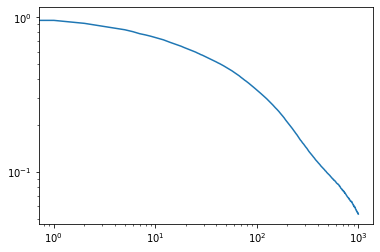

In [ ]:
params1 = training_loop(x_data1,y_data1)

In [ ]:
# evaluate correctness of the predictions 

predictionsNN1 = evaluations(x_data_valid, y_data_valid, params1)

In [ ]:
# calculate and print common metrics

acc = accuracy(predictionsNN1[0],predictionsNN1[1],predictionsNN1[2],predictionsNN1[3]),
sens = sensitivity(predictionsNN1[0], predictionsNN1[3]),
spec = specificity(predictionsNN1[1], predictionsNN1[2]),
prec = precision(predictionsNN1[0], predictionsNN1[2])
f_me = F_measure(prec,sens[0])
auc = AUC(sens[0],spec[0])
  
print('cross-entropy %f' % cross_entropy(x_data_valid, y_data_valid, params1))
print('Accuracy      ' + '{:.1%}'.format(acc[0]))
print('Sensitivity   ' + '{:.1%}'.format(sens[0]))
print('Specificity   ' + '{:.1%}'.format(spec[0]))
print('Precision     ' + '{:.1%}'.format(prec))
print('F_measure     ' + '{:.1%}'.format(f_me))
print('AUC           ' + '{:.1%}'.format(auc))

cross-entropy 0.164763
Accuracy      94.4%
Sensitivity   93.5%
Specificity   94.4%
Precision     2.9%
F_measure     5.7%
AUC           94.0%


  0%|          | 0/1000 [00:00<?, ?it/s]

train loss: 4.580e-02


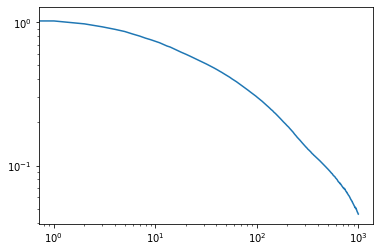

In [ ]:
params2 = training_loop(x_data2,y_data2)

In [ ]:
predictionsNN2= evaluations(x_data_valid, y_data_valid, params2)

In [ ]:
acc = accuracy(predictionsNN2[0],predictionsNN2[1],predictionsNN2[2],predictionsNN2[3]),
sens = sensitivity(predictionsNN2[0], predictionsNN2[3]),
spec = specificity(predictionsNN2[1], predictionsNN2[2]),
prec = precision(predictionsNN2[0], predictionsNN2[2])
f_me = F_measure(prec,sens[0])
auc = AUC(sens[0],spec[0])

print('cross-entropy %f' % cross_entropy(x_data_valid, y_data_valid, params2))  
print('Accuracy      ' + '{:.1%}'.format(acc[0]))
print('Sensitivity   ' + '{:.1%}'.format(sens[0]))
print('Specificity   ' + '{:.1%}'.format(spec[0]))
print('Precision     ' + '{:.1%}'.format(prec))
print('F_measure     ' + '{:.1%}'.format(f_me))
print('AUC           ' + '{:.1%}'.format(auc))

cross-entropy 0.307312
Accuracy      89.2%
Sensitivity   93.5%
Specificity   89.2%
Precision     1.6%
F_measure     3.1%
AUC           91.4%


  0%|          | 0/1000 [00:00<?, ?it/s]

train loss: 3.045e-02


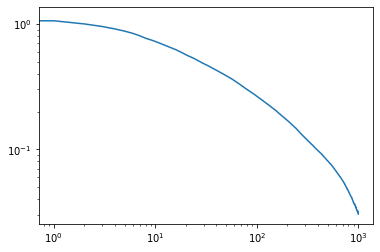

In [ ]:
params3 = training_loop(x_data3,y_data3)

In [ ]:
predictionsNN3 = evaluations(x_data_valid, y_data_valid, params3)

In [ ]:
acc = accuracy(predictionsNN3[0],predictionsNN3[1],predictionsNN3[2],predictionsNN3[3]),
sens = sensitivity(predictionsNN3[0], predictionsNN3[3]),
spec = specificity(predictionsNN3[1], predictionsNN3[2]),
prec = precision(predictionsNN3[0], predictionsNN3[2])
f_me = F_measure(prec,sens[0])
auc = AUC(sens[0],spec[0])

print('cross-entropy %f' % cross_entropy(x_data_valid, y_data_valid, params3))
print('Accuracy      ' + '{:.1%}'.format(acc[0]))
print('Sensitivity   ' + '{:.1%}'.format(sens[0]))
print('Specificity   ' + '{:.1%}'.format(spec[0]))
print('Precision     ' + '{:.1%}'.format(prec))
print('F_measure     ' + '{:.1%}'.format(f_me))
print('AUC           ' + '{:.1%}'.format(auc))

cross-entropy 0.350104
Accuracy      88.0%
Sensitivity   93.5%
Specificity   88.0%
Precision     1.4%
F_measure     2.8%
AUC           90.8%
